In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
hp = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Simple Linear Regression/Data/homeprices.csv')

In [3]:
hp.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


- Linear equation is 
  
    * price = m * area + b 

<Axes: xlabel='area', ylabel='price'>

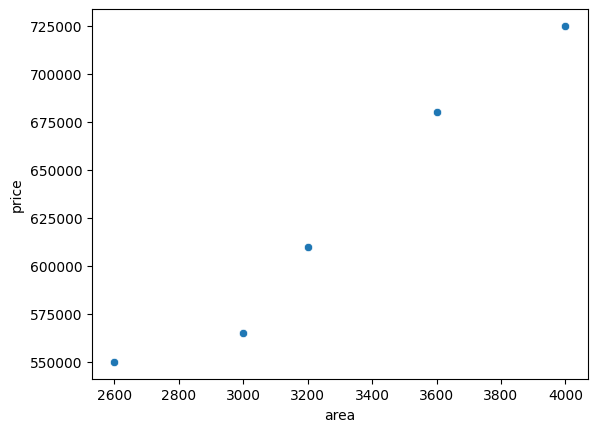

In [4]:
sns.scatterplot(data=hp,x='area',y='price')

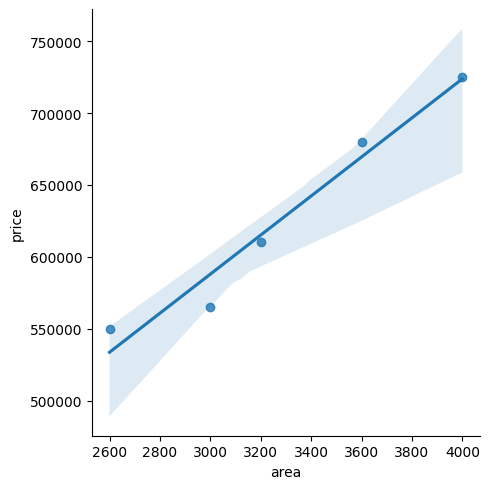

In [5]:
sns.lmplot(data=hp,x='area',y='price')

- When we observe the data point(dots) in the scatter plot,we can  understand that they can be connected more or less using a straight line.Hence,we can apply Simple Linear Regression Machine learning model on this data.
- Using sklearn package->scikit represents Scientific Python Toolkit
- https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
reg

LinearRegression()

- 'x' indicates independent variable(hp.area).This should be supplied in the form of 2D array to the fit() method.
- 'y' indicates dependent variable(hp.price).
- Now the question is how to convert the hp.area column data into a 2D array.
- There are 2 ways.
    1. The first way is to first convert the df.area column into an array by using values attribues.Then convert the 1D array to 2D array by using reshape(-1,1) [resultant array has only 1 column]
        * Let us take an array of shape(2,4).When we reshape it with (-1,1),then the array will get reshaped in such a way thet the resultant array has only 1 column and this is only possibleby having 8 rows(i.e 2 X 4 = 8).Hence the resultant array will have the shape of (8,1)
    2. hp[['area']]

In [17]:
x = hp.area.values.reshape(-1,1)
y = hp.price

In [18]:
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [19]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [20]:
reg.fit(x,y)

LinearRegression()

- 'Fitting' means the model has been trained with the data.That means,the model could have tried to fit the data in form of straight line.That means the model could have understood that there is linear relationship existing between the 'area' and 'price' columns.
- Once the model understands the data,then it is ready to be tested with new data.

In [22]:
reg.predict([[3000]])

array([587979.45205479])

-  Observe the output.It shows only 1 element in the form of 1D array.It says that the price of a 3000 sq house will be around 587979 dollars.Remember,The output of the machine learning models will be 1D array.

### Calculate the Slope

In [25]:
m = reg.coef_
print("The Slope is:",m)

The Slope is: [135.78767123]


#### Calculate the intercept

In [27]:
b = reg.intercept_
print("The intercept is:",b)

The intercept is: 180616.43835616432


In [29]:
x = 3000 
y_pred = m * x + b 
print(y_pred)

[587979.45205479]


#### Checking r2 Score

In [30]:
from sklearn.metrics import r2_score

In [33]:
y_original = hp.price
y_predicted = reg.predict(hp[['area']])
r_squared = r2_score(y_original, y_predicted)
print("The accuracy of the model:",r_squared * 100) 

The accuracy of the model: 95.84301138199486


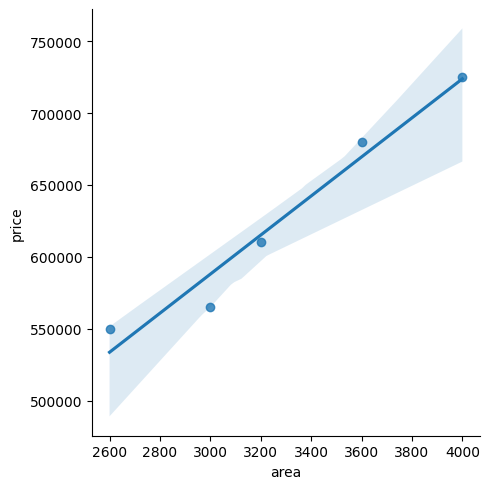

In [34]:
sns.lmplot(data=hp,x='area',y='price')

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_original, y_predicted)
print("Mean Squared Error:",mse)

Mean Squared Error: 186815068.4931509


In [36]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_original, y_predicted)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 13668.030893042014


In [37]:
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R-squared.
    
    Parameters:
    - r2: R-squared value.
    - n: Number of data points (observations).
    - p: Number of independent variables (predictors).
    
    Returns:
    - Adjusted R-squared value.
    """
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Example usage
# Sample data
y_true = y_original
y_pred1 = y_predicted

# Calculate R-squared
r2 = r2_score(y_true, y_pred1)

# Number of observations and predictors
n = len(y_true)  # number of data points
p = 1  # number of predictors (for simple linear regression)

# Calculate Adjusted R-squared
adj_r2 = adjusted_r2(r2, n, p)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.9584301138199486
Adjusted R-squared: 0.9445734850932648


In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_original, y_predicted)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.019201242020345188
